In [1]:
import xml.etree.ElementTree as ET

In [2]:
footways = ET.parse("petrogradka_footways.osm")

In [5]:
root = footways.getroot()

In [10]:
from collections import defaultdict

In [41]:
graph = nx.Graph()
nodes = {}
for child in root:
    if child.tag == "node":
        nodes[int(child.attrib['id'])] = child.attrib
        graph.add_node(int(child.attrib['id']))
    if child.tag == "way":
        points = [i for i in child if i.tag == "nd"]
        for prev, next in zip(points[:-1], points[1:]):
            rasst = haversine(
                (float(nodes[int(prev.attrib['ref'])]['lon']), float(nodes[int(prev.attrib['ref'])]['lat'])),
                (float(nodes[int(next.attrib['ref'])]['lon']), float(nodes[int(next.attrib['ref'])]['lat']))
            )
            graph.add_edge(
                int(prev.attrib['ref']),
                int(next.attrib['ref']),
                weight=rasst
            )

In [44]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 27.3 MB 5.0 MB/s eta 0:00:01


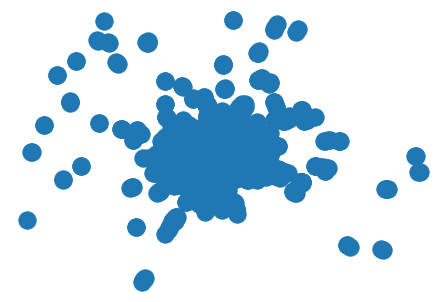

In [45]:
nx.draw(graph)

In [28]:
from math import *
def haversine(koord1,koord2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [koord1[0],koord1[1],koord2[0],koord2[1]])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    dist = 6371000 * c
    return dist

In [37]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 472 kB/s eta 0:00:01


In [38]:
from networkx import nx

In [40]:
graph = nx.Graph1()

In [51]:
S = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]

In [56]:
g = max(S, key=len)

In [57]:
g.size()

4437

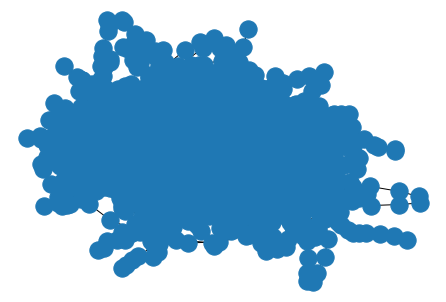

In [58]:
nx.draw(g)

In [59]:
nx.write_edgelist(g, "petrogradka_edge_list.txt")

In [60]:
import json
with open("nodes.json", "w") as f:
    json.dump(nodes, f)